<a href="https://colab.research.google.com/github/CJ-Kaufman/INDE577_2024/blob/main/Unsupervised_Learning/Principal%20Component%20Analysis/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA) Implementation
## Introduction
PCA is a technique used for dimensionality reduction and exploratory data analysis. It projects data points onto the first few principal components, retaining as much variation as possible while eliminating redundant, highly-correlated features. The first principal component maximizes variance, and each subsequent component captures the next highest variance, orthogonal to the previous ones. PCA is computed using the eigenvectors of the covariance matrix or via Singular Value Decomposition (SVD) of the data matrix, simplifying the dataset for further analysis.


## Imports and Data Loading
We'll use the penguins dataset with these 4 variables, cleaned for NANs: "bill_length_mm", "bill_depth_mm", "flipper_length_mm", and "body_mass_g".

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

penguins = sns.load_dataset("penguins")

# Clean the data for NANs
penguins_clean = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"])

# Assign the cleaned data to X and y
X = penguins_clean[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
y = penguins_clean.species.to_numpy()

# Now X and y have no NaN values, check they have the same size
print(X.shape, y.shape)

(342, 4) (342,)


## Implement and Visualize PCA

In [ ]:
# Center the data by subtracting the mean of each feature (mean centering)
A = X - X.mean(axis = 0)

# Perform Singular Value Decomposition (SVD) on the mean-centered data (A)
# U: left singular vectors (data projections)
# sigma: singular values (related to the amount of variance captured by each principal component)
# Vt: right singular vectors (principal components)
U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

# Print the shapes of the components from SVD to understand the structure of the matrices
print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (342, 4)
np.shape(sigma) = (4,)
np.shape(Vt) = (4, 4) 



In [ ]:
# Reconstruct the original data matrix using U, sigma, and Vt to verify the decomposition
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



In [ ]:
# Extract the first 4 principal components from Vt (the rows of Vt are the principal components)
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

# Select the first two principal components for 2D projection (reduce the data to 2D)
W2 = Vt.T[:, :2]
X2D = A.dot(W2)

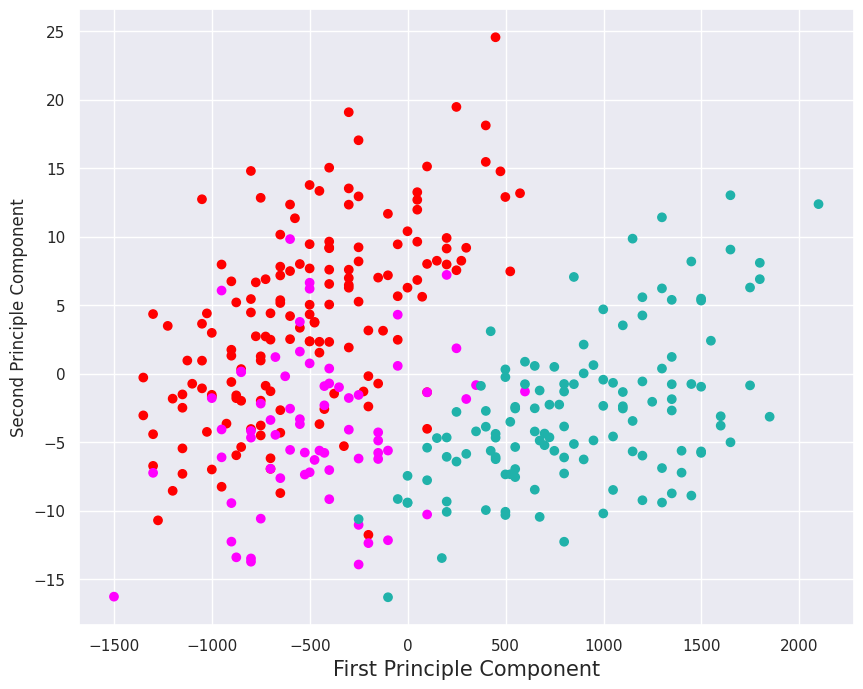

In [ ]:
def colors(y):
    if y == "Adelie":
        return "red"
    elif y == "Chinstrap":
        return "magenta"
    else:
        return "lightseagreen"

# Assign colors to each data point based on its species
c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()

Here we see a 2D projection of the data using the first two principal components.

## Visualize Component Variance

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

# Calculate and print the percentage of variance explained by each principal component
per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.68843878 0.19312919 0.09130898 0.02712305]
per_var = [68.84 19.31  9.13  2.71] 



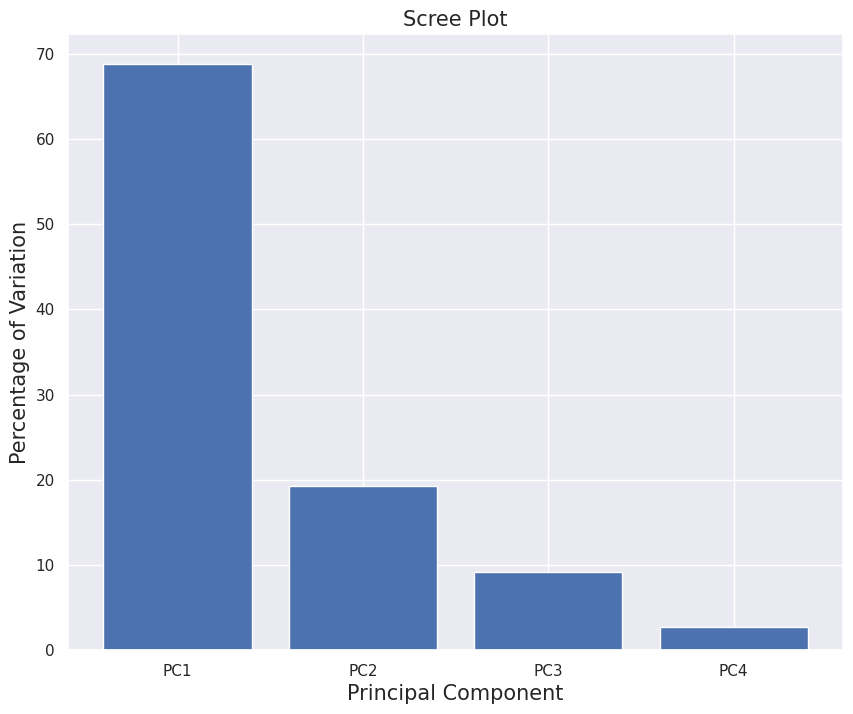

In [ ]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

The bar chart above indicates the amount of variance of each principal component, which is related to their importance on identifying separating factors in the data to help with classification. Here we can see PC1 has more than double the impact of PC2, while PC4 barely has any variation at all.

In [ ]:
# we call function pca.components_ to see how each PC is obtained
# as a linear combination of the original coordinates
features = list(set(penguins.columns) - {"species", "sex", "island"})

pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2,PC3,PC4
bill_length_mm,0.455250,-0.400335,0.576013,0.548350
body_mass_g,0.597031,0.797767,0.002282,0.084363
bill_depth_mm,0.644301,-0.418427,-0.232084,-0.596600
flipper_length_mm,-0.145523,0.167986,0.783799,-0.579882


This chart tells us how each component is made. For example, here PC1 is a combination of:

0.45525 * bill length + 0.597031 * body mass + 0.644301 * bill depth + -0.145523 * flipper length

In [ ]:
# we use pca.transform to see how our data looks like in the new coordinate system
# this will be used later to plot our data in the first two coordinates PC1, PC2

pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

,PC1,PC2,PC3,PC4
0,-1.843445,0.047702,-0.232794,-0.523903
1,-1.306762,-0.428348,-0.029562,-0.402426
2,-1.369181,-0.154476,0.198672,0.528007
3,-1.878827,-0.002048,-0.618596,0.478378
4,-1.911748,0.829210,-0.686584,0.207428
...,...,...,...,...
337,2.006436,-0.958909,0.364630,-0.174829
338,1.840886,-0.767714,0.229386,-0.002905
339,2.760742,0.288886,-0.428439,-0.240717
340,1.722364,-0.704269,-0.276979,-0.338516


In [ ]:
# we add to the previous table the labels for each penguin

projected_df = pd.concat([pca_df, penguins.species], axis = 1)
projected_df

,PC1,PC2,PC3,PC4,species
0,-1.843445,0.047702,-0.232794,-0.523903,Adelie
1,-1.306762,-0.428348,-0.029562,-0.402426,Adelie
2,-1.369181,-0.154476,0.198672,0.528007,Adelie
3,-1.878827,-0.002048,-0.618596,0.478378,Adelie
4,-1.911748,0.829210,-0.686584,0.207428,Adelie
...,...,...,...,...,...
339,2.760742,0.288886,-0.428439,-0.240717,Gentoo
340,1.722364,-0.704269,-0.276979,-0.338516,Gentoo
341,2.028902,0.357620,-0.162893,-0.442237,Gentoo
342,NaN,NaN,NaN,NaN,Gentoo


In [ ]:
# Truncate projected_df to match the length of c
projected_df = projected_df.iloc[:len(c)]

print(len(projected_df))  # Check the number of rows in projected_df
print(len(c))  # Check the length of c (helpful for troubleshooting data after cleaning)

projected_df["color"] = c
projected_df

342
342


<ipython-input-15-4edc17fe34a3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projected_df["color"] = c


,PC1,PC2,PC3,PC4,species,color
0,-1.843445,0.047702,-0.232794,-0.523903,Adelie,red
1,-1.306762,-0.428348,-0.029562,-0.402426,Adelie,red
2,-1.369181,-0.154476,0.198672,0.528007,Adelie,red
3,-1.878827,-0.002048,-0.618596,0.478378,Adelie,red
4,-1.911748,0.829210,-0.686584,0.207428,Adelie,red
...,...,...,...,...,...,...
337,2.006436,-0.958909,0.364630,-0.174829,Gentoo,lightseagreen
338,1.840886,-0.767714,0.229386,-0.002905,Gentoo,lightseagreen
339,2.760742,0.288886,-0.428439,-0.240717,Gentoo,lightseagreen
340,1.722364,-0.704269,-0.276979,-0.338516,Gentoo,lightseagreen


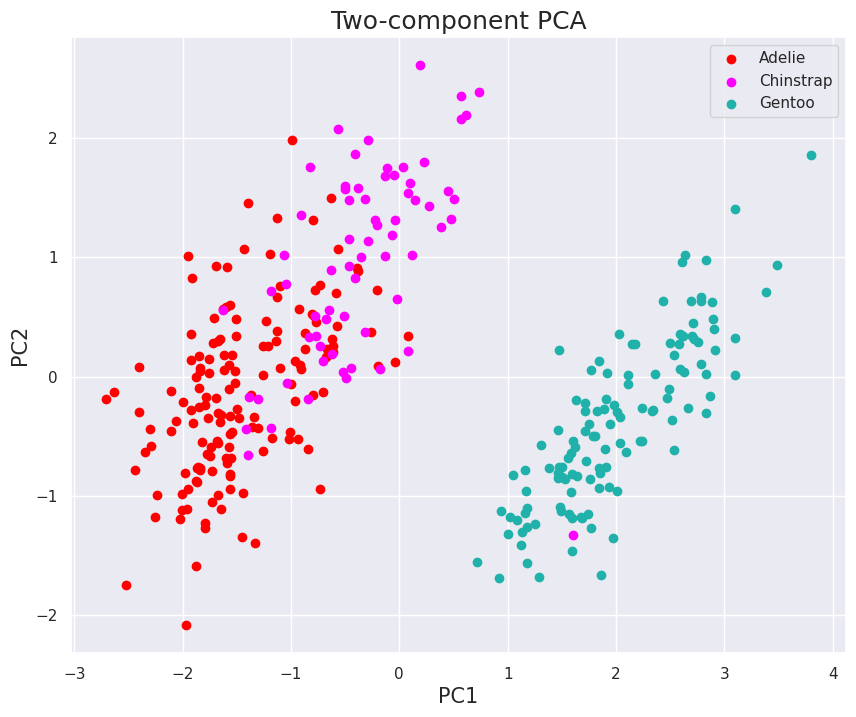

In [ ]:
targets = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)

plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

## Results

The plot above shows a 2D scatter plot of the penguin dataset projected onto the first two principal components (PC1 and PC2) after performing PCA. The data is projected into a two-dimensional space, where the x-axis corresponds to the first principal component (PC1) and the y-axis corresponds to the second principal component (PC2). These principal components are linear combinations of the original features, which capture the directions of maximum variance in the dataset.

If the points are well-separated in the 2D space, it suggests that the species differ significantly in terms of their features (such as size, bill length, and flipper length). If there is overlap, it might indicate that the species share similar feature characteristics in this reduced 2D space. In summary, the plot helps you visualize the relationship between the penguin species based on their most significant features. It uses PCA to reduce the dataset to two dimensions (PC1 and PC2), allowing you to assess how distinct or similar the species are based on the variations captured in those principal components.